In [755]:
import matplotlib.pylab as plt
import matplotlib.ticker
import networkx as nx
import pandas as pd
import numpy as np
import re 
import collections
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable

componentes=open("Datos_componentes3.txt",'r').read().split('\n')
componentes2=[]
conexiones_big_brother=[]

for comp in componentes:
	comp=comp.strip('-')
	componentes2.append(comp)



for ii in range(len(componentes2)):
	
	for jj in range(len(componentes2)):
		bb_exists=False
		if componentes2[jj].find(componentes2[ii])!=-1:
			bb_exists=True
			bb=componentes2[jj]
		if bb_exists:
			conexiones_big_brother.append([componentes2[ii],componentes2[jj]])
			#print(componentes2[jj],componentes2[ii],bb_exists)


		
        
	

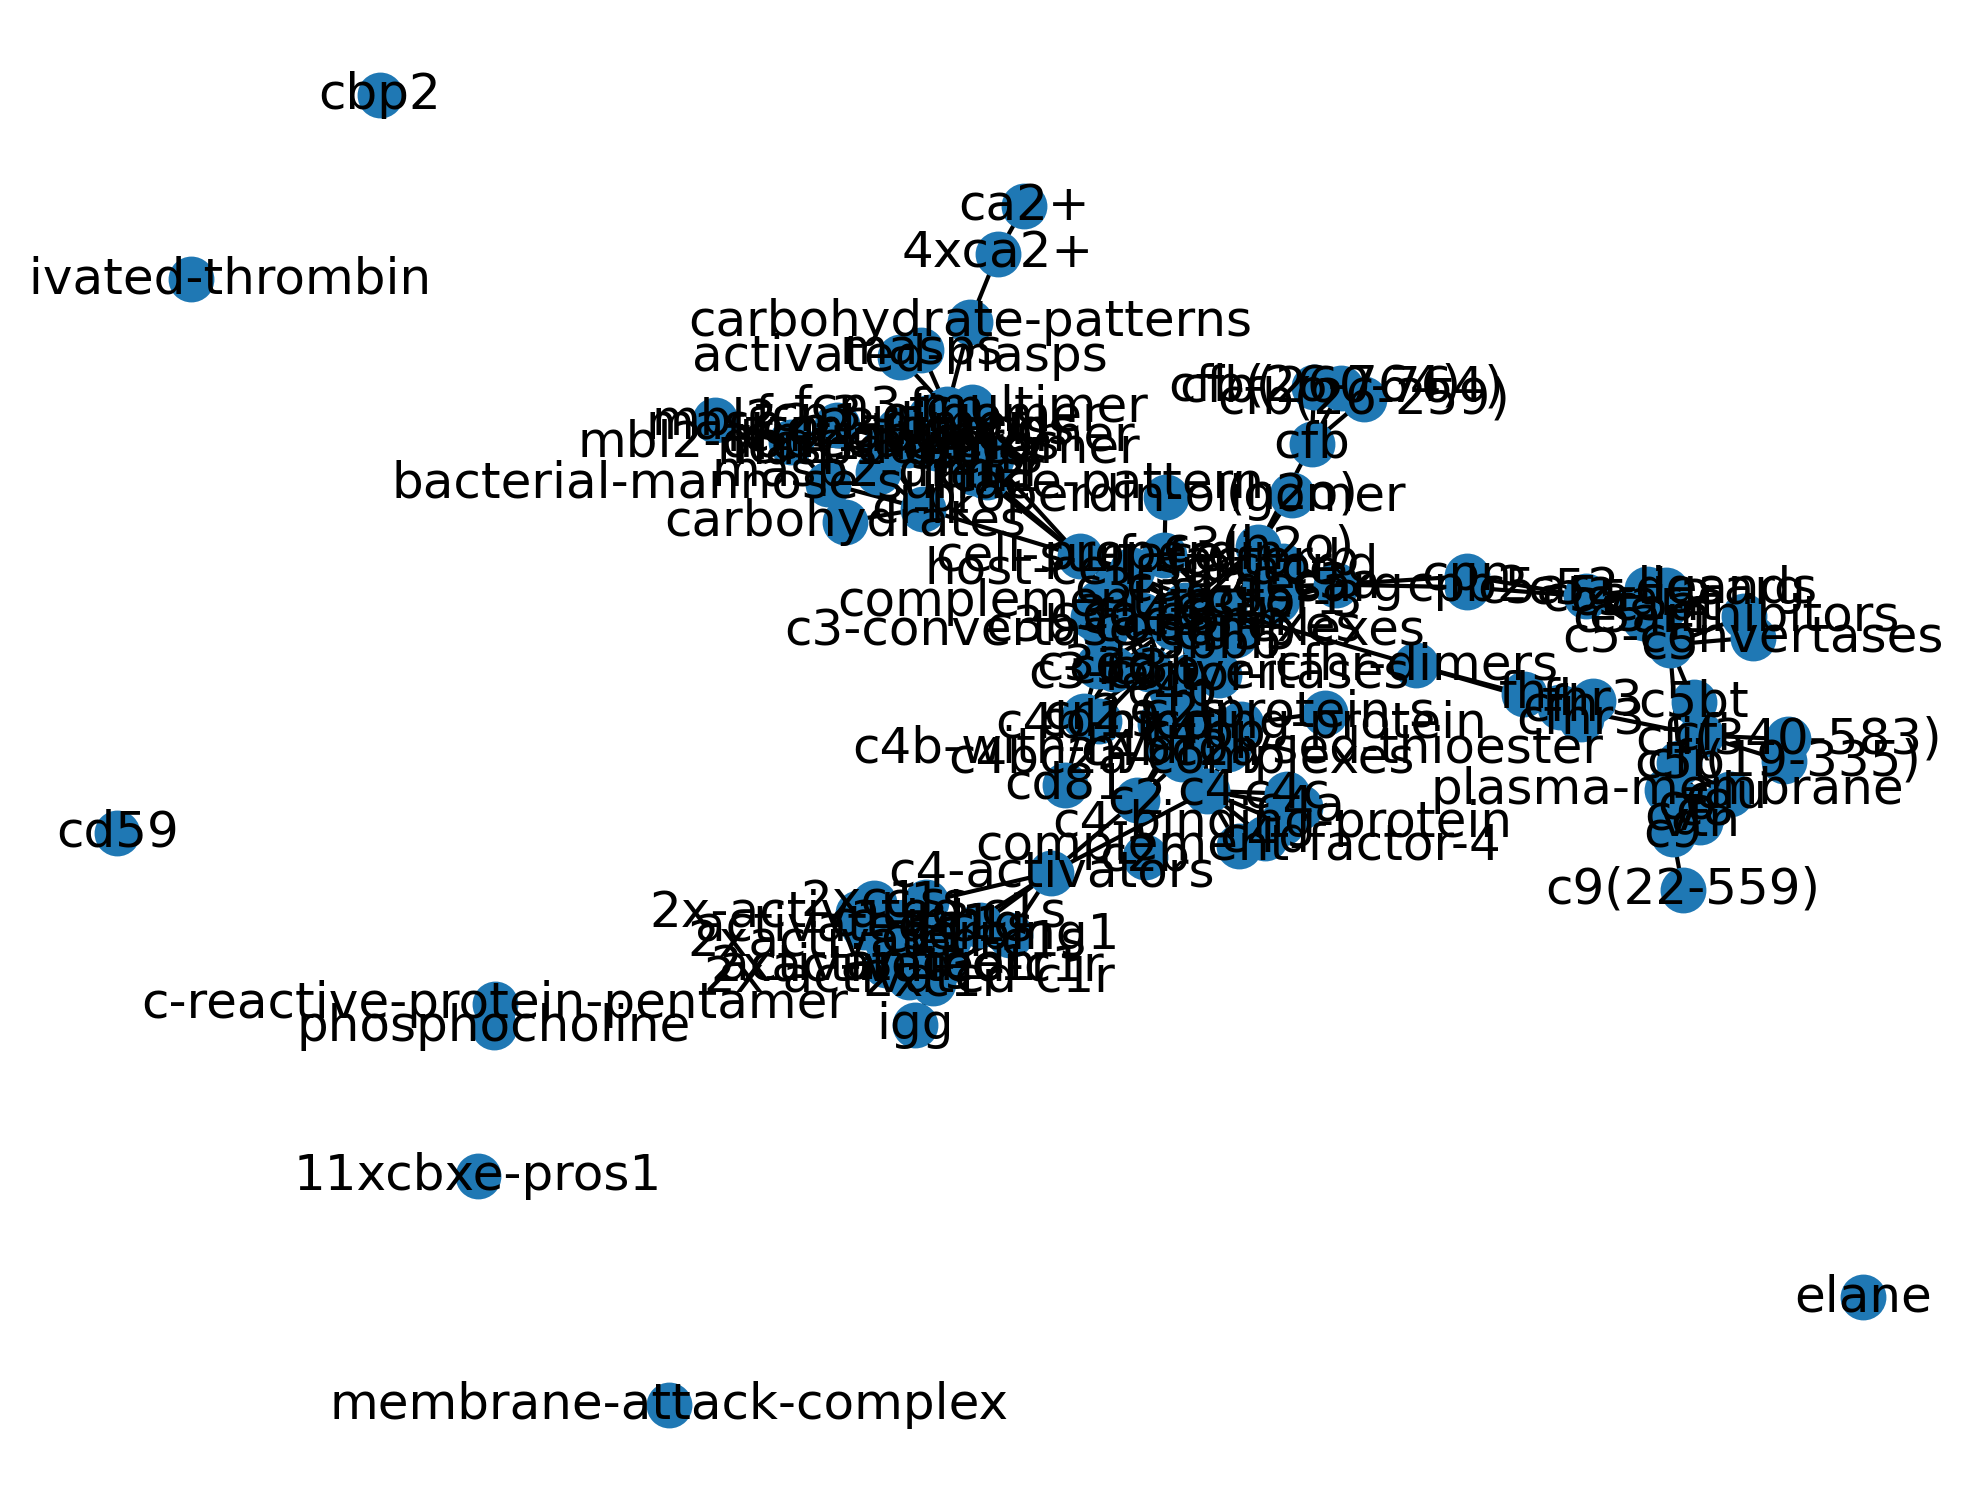

In [756]:
conexiones=				open("Conexiones.txt",'r').read().split('\n')
nodos=					open("Componentes.txt",'r').read().split('\n')
conexiones_implicitas=	open("Conexiones_implicitas.txt",'r').read().split('\n')

G=nx.Graph()

for nodo in nodos:
	G.add_node(nodo)
	
for conexion in conexiones:
	elementos=conexion.split(',')
	if G.has_node(elementos[0]) and G.has_node(elementos[1]):
		G.add_edge(elementos[0],elementos[1])
	else:
		print('----------- no esta -----------\n',elementos)
for conexion in conexiones_big_brother:
	if G.has_node(elementos[0]) and G.has_node(elementos[1]):
		G.add_edge(conexion[0],conexion[1])
	else:
		print('----------- no esta -----------\n',conexion)



for conex_implicita in conexiones_implicitas:
	elementos=conex_implicita.split(',')
	#print(elementos)
	if G.has_node(elementos[0]) and G.has_node(elementos[1]):
		#print(elementos)
		G.add_edge(elementos[0],elementos[1])
	else:
		print('----------- no esta -----------\n',elementos)

	

plt.figure(dpi=300)
G.remove_edges_from(nx.selfloop_edges(G))
nx.draw(G,with_labels=True,node_size=100)

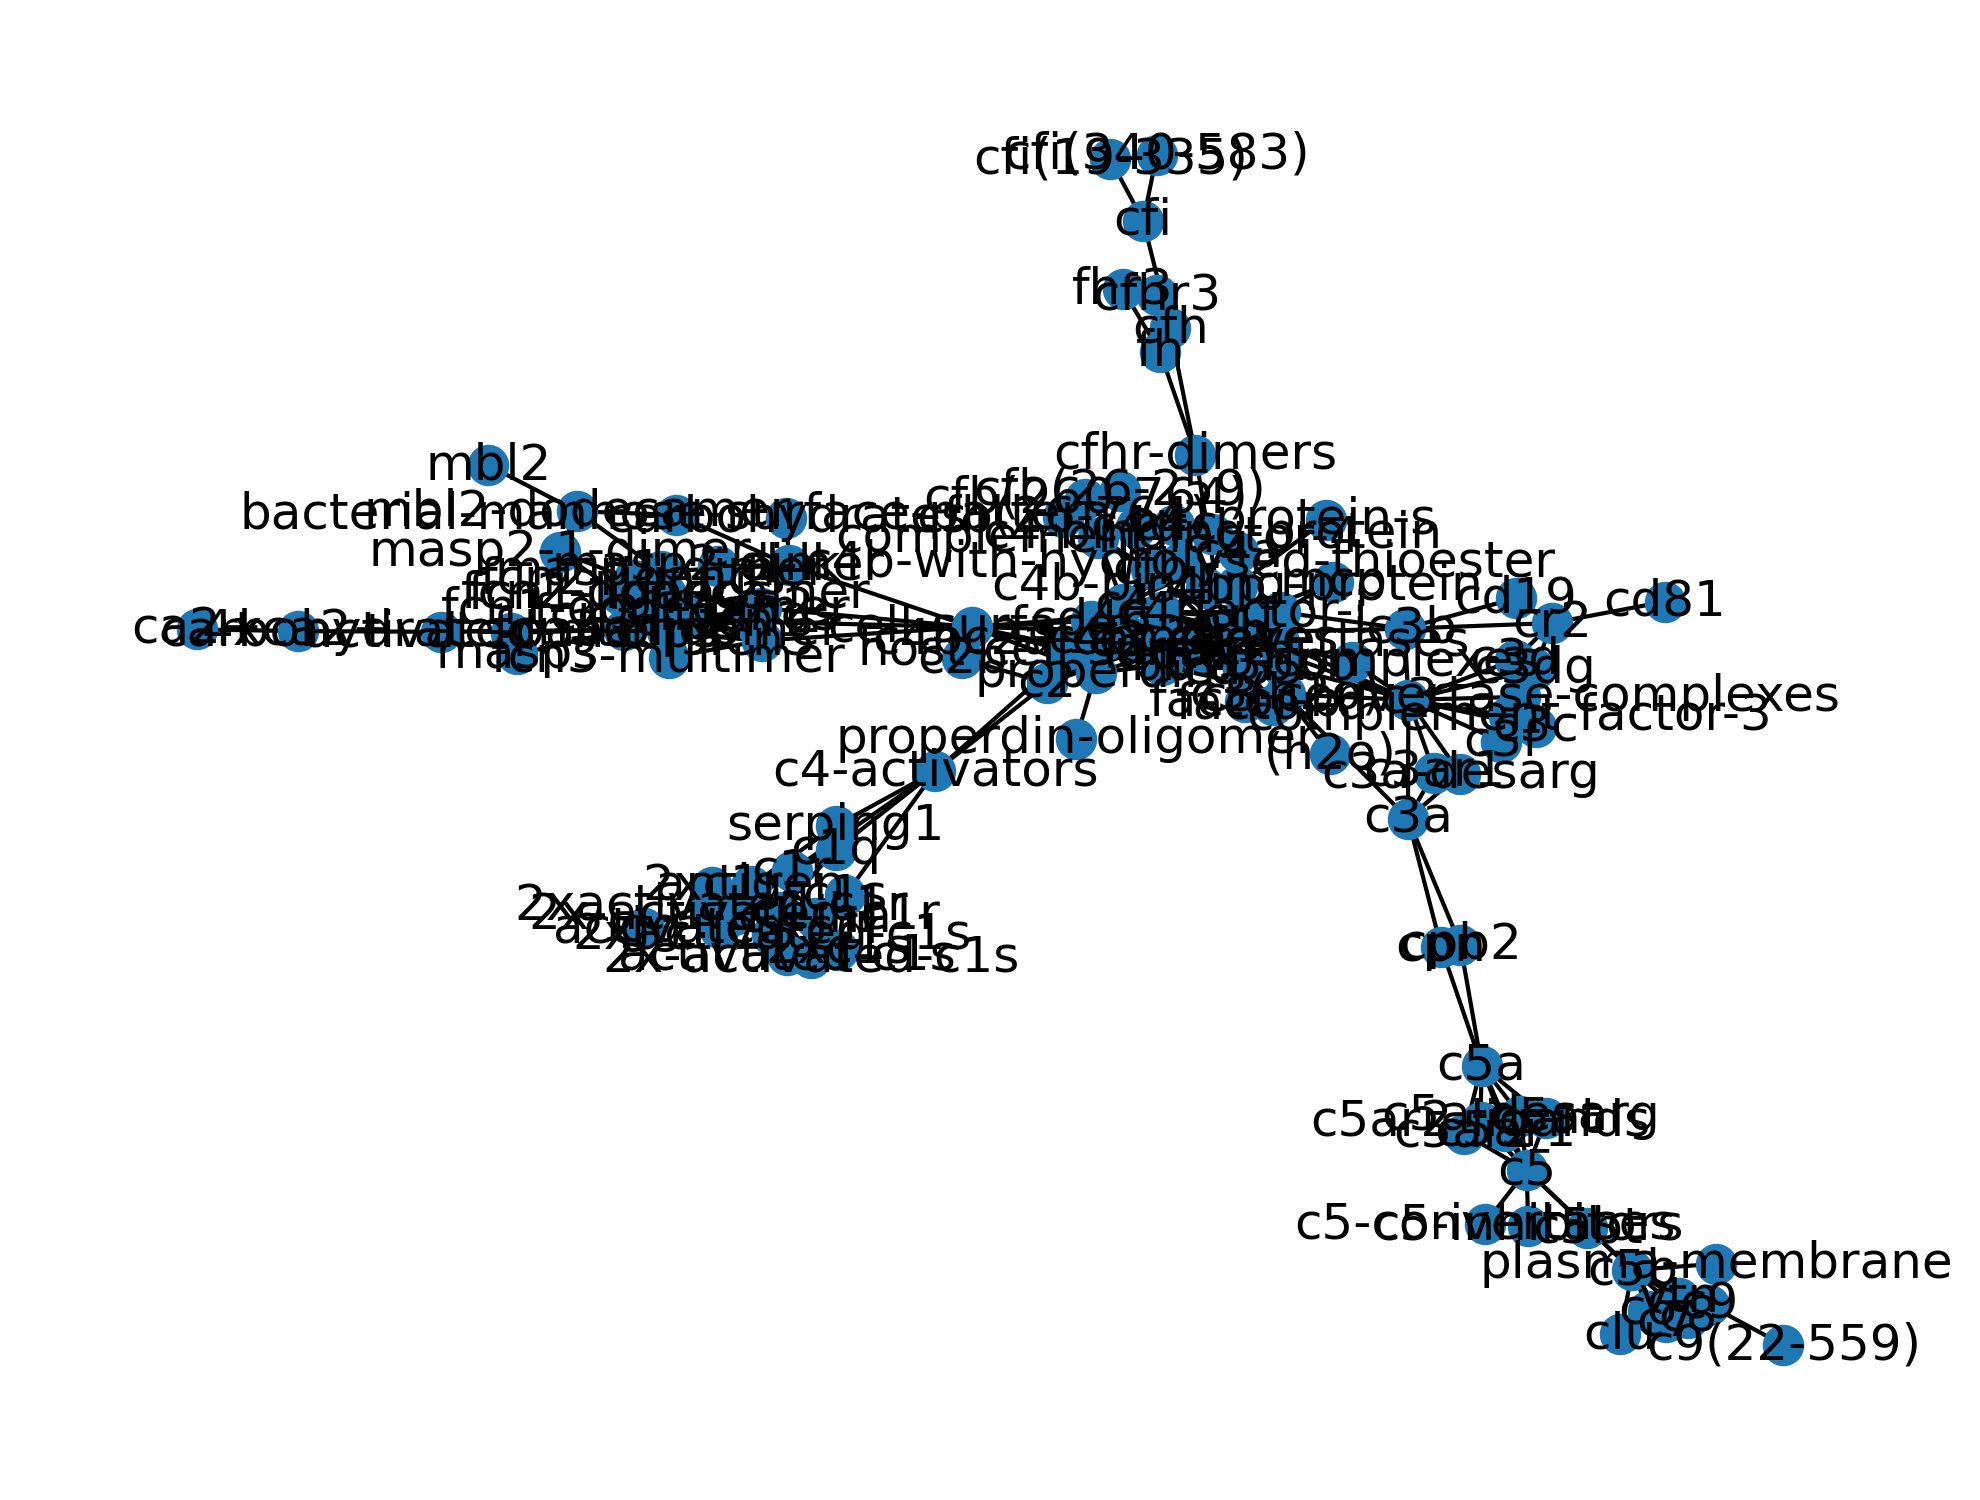

In [757]:
Label=True
plt.figure(dpi=300)
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
G_base=G0
nx.draw(G0, with_labels=Label,node_size=80)

In [758]:
nx.write_gexf(G0,'./Grafo.gexf')

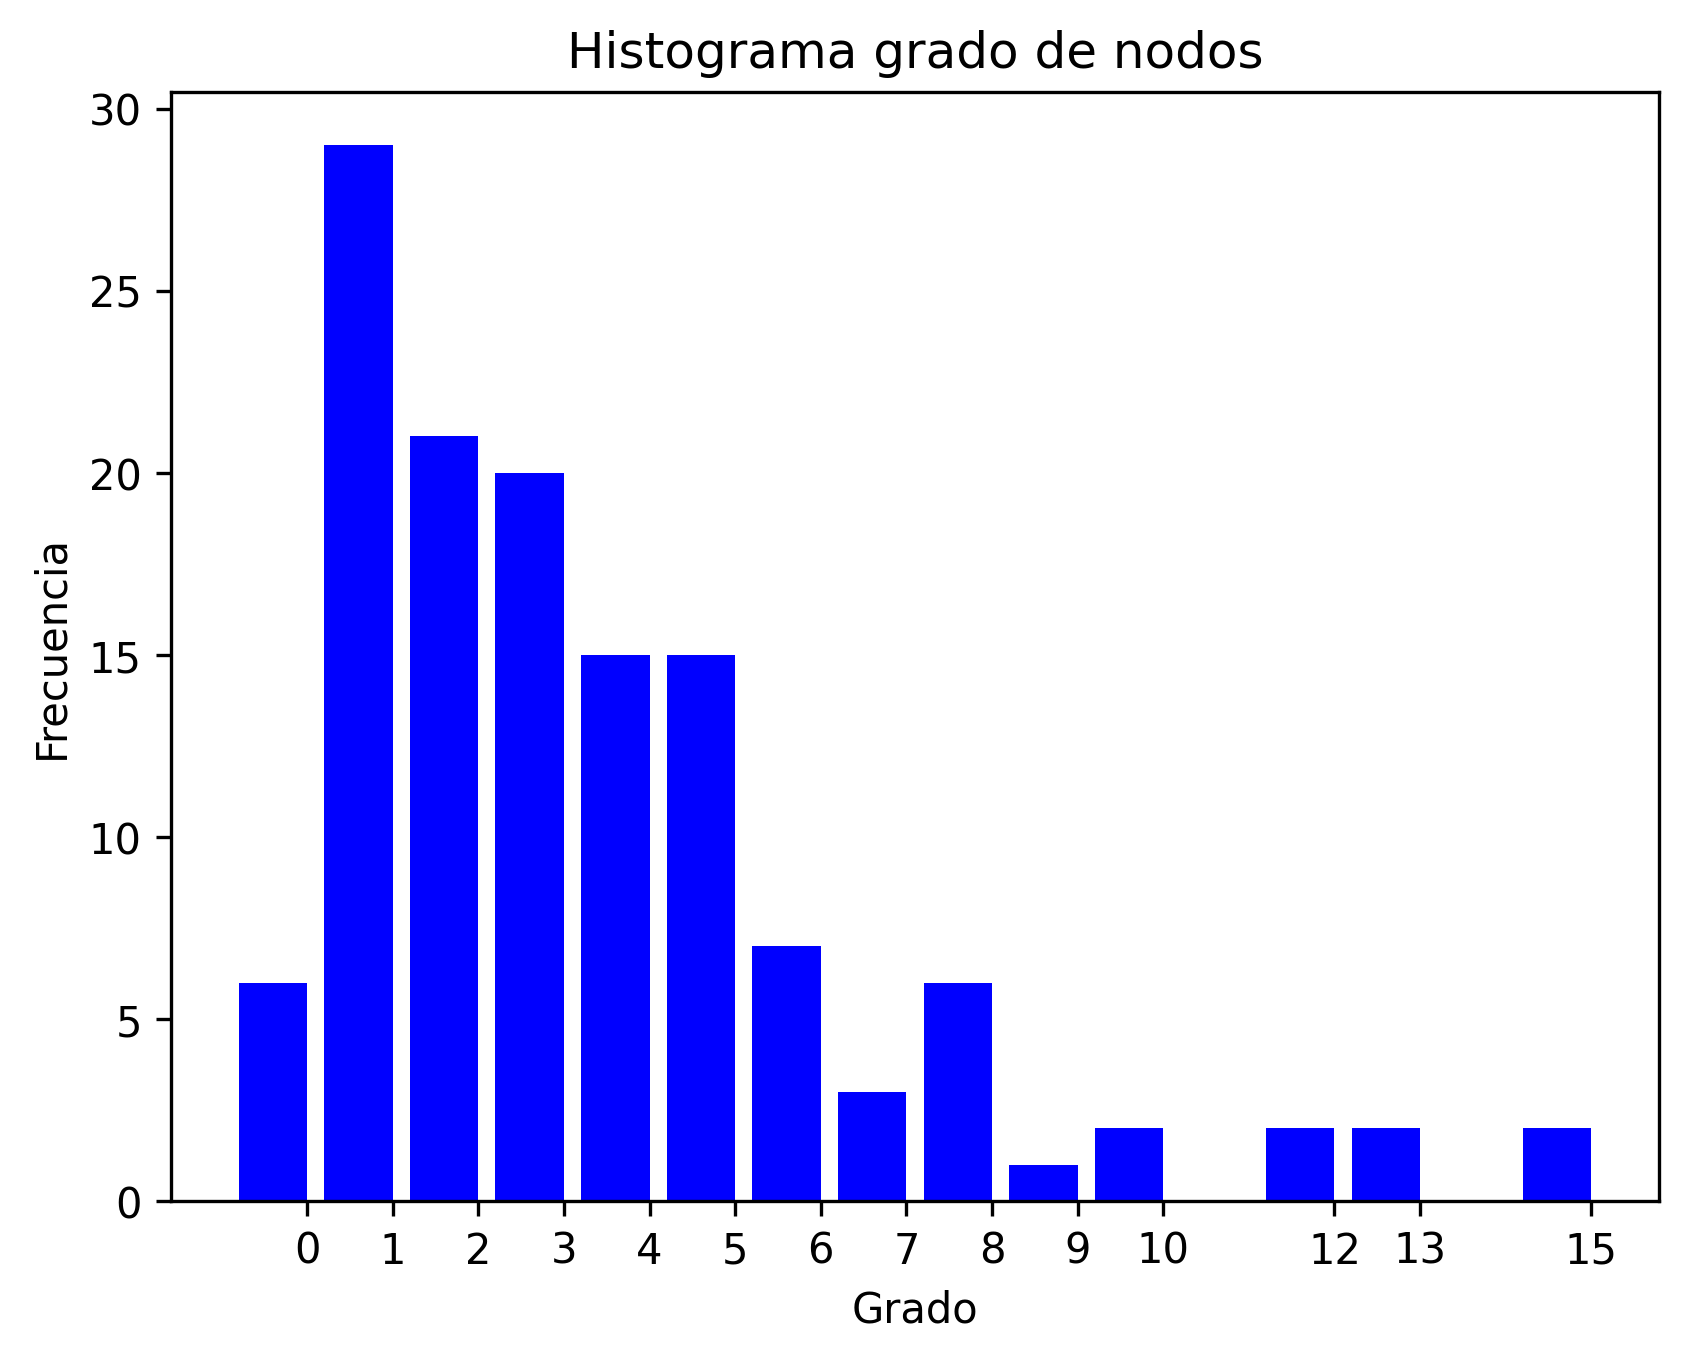

In [759]:



degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(dpi=300)
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Histograma grado de nodos")
plt.ylabel("Frecuencia")
plt.xlabel("Grado")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
pos = nx.spring_layout(G)
plt.axis('off')

plt.show()

[47 18 12 15 11  6  3  5  1  2  5  2  1  0  0  0  1  0  0  2]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


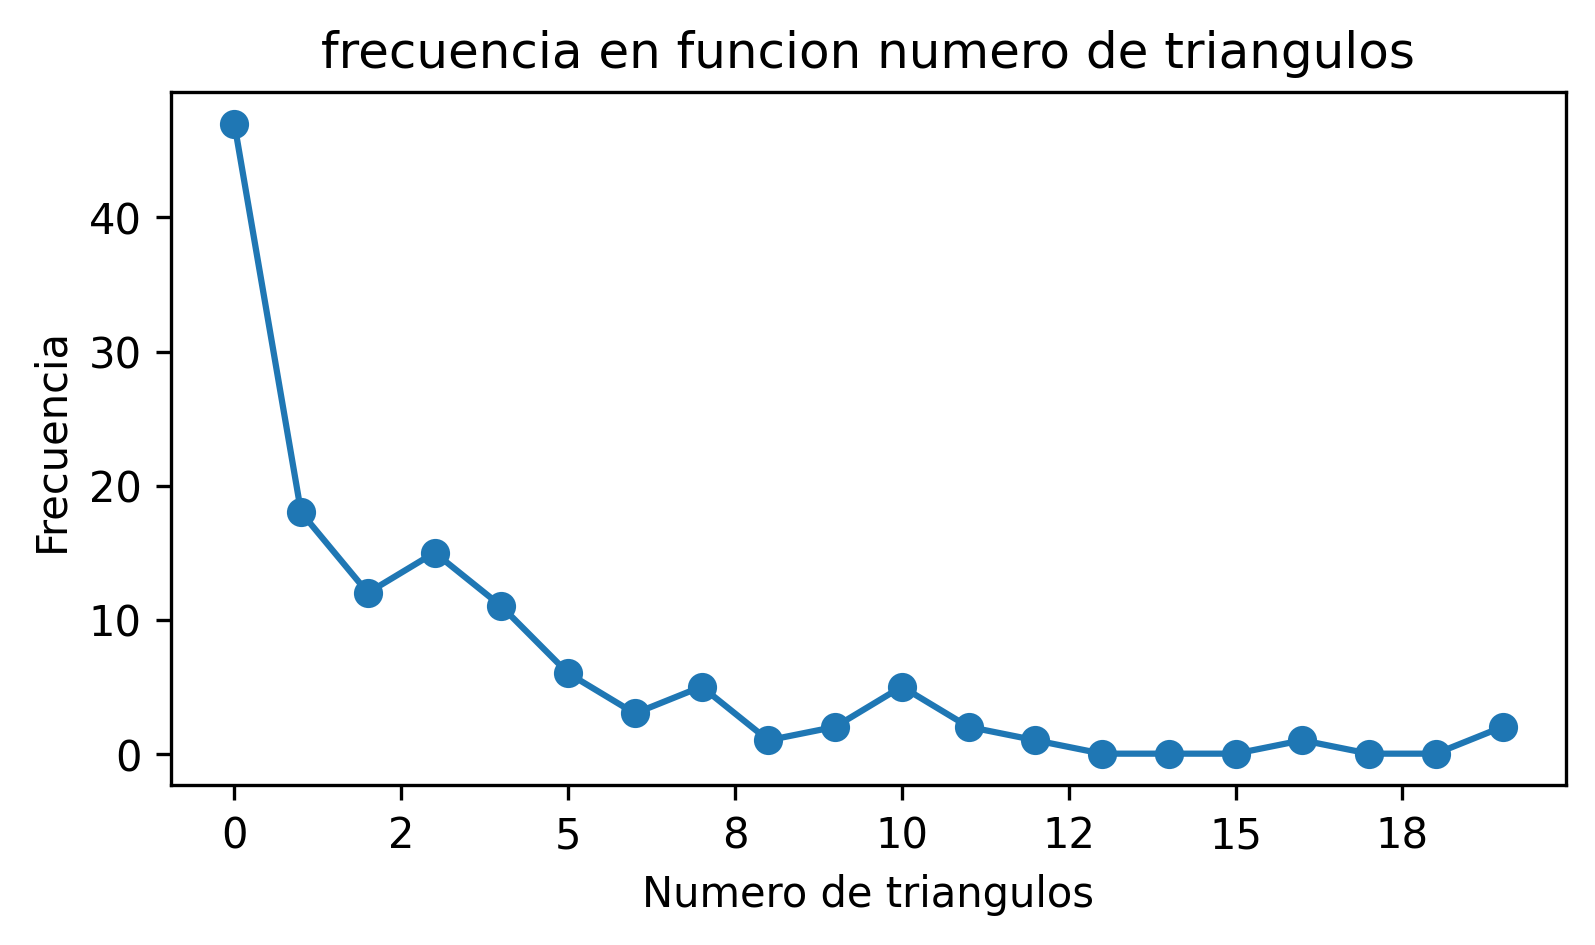

In [760]:
datos=nx.triangles(G)
df=pd.DataFrame(datos,index=[0])
df2=df.T
triangulos=df2[0].to_numpy()


histogram,bines=np.histogram(triangulos,bins=20,range=(0,20))
print(histogram)
print(bines)

plt.figure(dpi=300,figsize=(6,3))
plt.scatter(bines[:-1],histogram)
plt.plot(bines[:-1],histogram)
#plt.hist(histogram,bins=bines,color='darkorange',rwidth=0.9)
plt.title('frecuencia en funcion numero de triangulos')
plt.ylabel('Frecuencia')
plt.xlabel('Numero de triangulos')
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)


In [761]:
def get_k_min_node(G1):
    
	min_k=list(sorted(G.degree, key=lambda x: x[1], reverse=True))

	for i in min_k:
		for ii in i:
			k=ii
			if G1.has_node(k):
				return k




In [762]:

N=len(G.nodes)
print(N)
colors = [[(200)/255,(100)/255,(100)/255], [(200)/255,(100+N*0.7)/255,(100-N*0.7)/255]]
print(colors)
cmap = mcolors.LinearSegmentedColormap.from_list('mycmap', colors)
norm = BoundaryNorm([0, 1], cmap.N)

for n in range(len(G.nodes)):
	fig,ax= plt.subplots(figsize=(6, 4),dpi=300)
	datos=G.degree()
	df=pd.DataFrame(datos)
	df2=df
	triangulos=df2[1].to_numpy()
	histogram,bines=np.histogram(triangulos,bins=16,range=(0,16))


	r=(200)/255
	g=(100+n*0.7)/255
	b=(100-n*0.7)/255
	color1=np.array((r,g,b))
	color=np.tile(color1, (len(histogram), 1))

	ax.scatter(bines[:-1],histogram,c=color)
	ax.plot(bines[:-1],histogram,c=color1)
	
	k=get_k_min_node(G)
	G.remove_node(k)


	ax.set_yscale('log')
	ax.set_title("Frecuencia del grado")
	ax.set_xlabel("Grado del nodo")
	ax.set_ylabel('Frecuencia')

	plt.savefig(f'evolucion/imagen{n}')
	plt.clf()
	plt.close()


131
[[0.7843137254901961, 0.39215686274509803, 0.39215686274509803], [0.7843137254901961, 0.7517647058823529, 0.032549019607843184]]


0
[[0.7843137254901961, 0.39215686274509803, 0.39215686274509803], [0.7843137254901961, 0.39215686274509803, 0.39215686274509803]]


C:\Users\Usuario\AppData\Local\Temp\ipykernel_19216\2019768639.py:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(plt.cm.ScalarMappable( cmap=cmap),ticks=np.linspace(0,1,14))


Text(0, 0.5, 'Frecuencia')

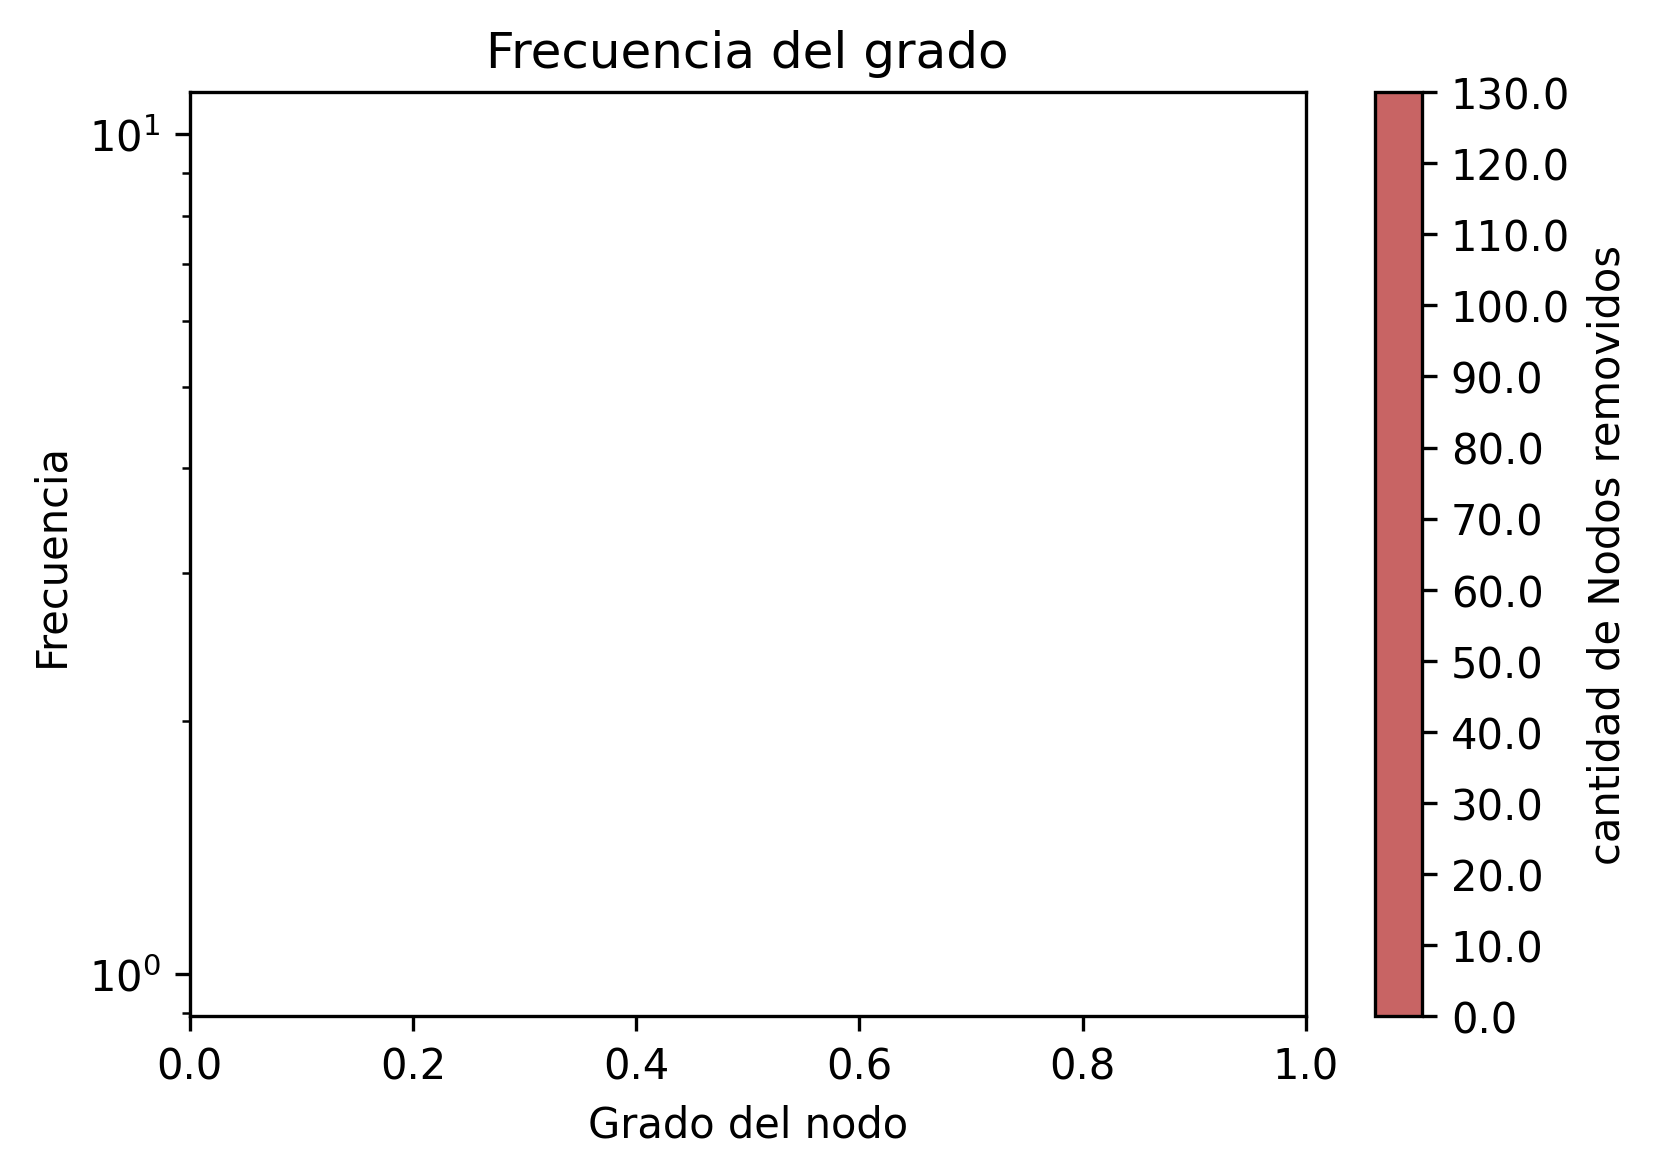

In [763]:
fig,ax= plt.subplots(figsize=(6, 4),dpi=300)
N=len(G.nodes)
print(N)
colors = [[(200)/255,(100)/255,(100)/255], [(200)/255,(100+N*0.7)/255,(100-N*0.7)/255]]
print(colors)
cmap = mcolors.LinearSegmentedColormap.from_list('mycmap', colors)
norm = BoundaryNorm([0, 1], cmap.N)

for n in range(len(G.nodes)):
	datos=G.degree()
	df=pd.DataFrame(datos)
	df2=df
	triangulos=df2[1].to_numpy()
	histogram,bines=np.histogram(triangulos,bins=16,range=(0,16))


	r=(200)/255
	g=(100+n*0.7)/255
	b=(100-n*0.7)/255
	color1=np.array((r,g,b))
	color=np.tile(color1, (len(histogram), 1))

	ax.scatter(bines[:-1],histogram,c=color)
	ax.plot(bines[:-1],histogram,c=color1)
	

	inte=np.random.randint(0,len(G.nodes()))
	H=list(G.nodes())[inte]
	G.remove_node(H)

cbar = fig.colorbar(plt.cm.ScalarMappable( cmap=cmap),ticks=np.linspace(0,1,14))
cbar.set_ticklabels(np.linspace(0,130,14))
cbar.set_label("cantidad de Nodos removidos")
ax.set_yscale('log')
ax.set_title("Frecuencia del grado")
ax.set_xlabel("Grado del nodo")
ax.set_ylabel('Frecuencia')